In [0]:
#!pip install tensorflow==2.0.0b1 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,Conv2D
import numpy as np

In [0]:
#cac tham so
batch_size=128
nclasses = 10
epochs =5

img_rows, img_cols =28,28

In [0]:
def load_data(filename):
  return np.load(filename)['arr_0']
x_train = load_data("/content/gdrive/My Drive/kmnist-train-imgs.npz")
y_train = load_data("/content/gdrive/My Drive/kmnist-train-labels.npz")
x_test  = load_data("/content/gdrive/My Drive/kmnist-test-imgs.npz")
y_test  = load_data("/content/gdrive/My Drive/kmnist-test-labels.npz")

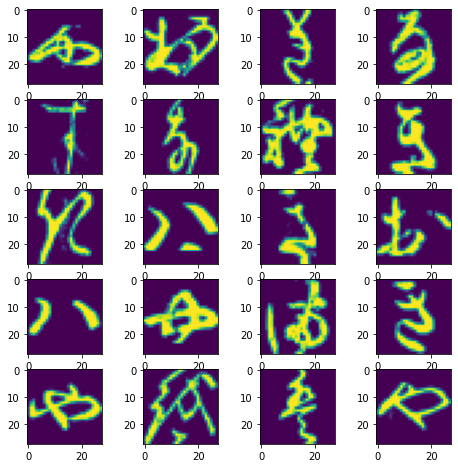

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i])
plt.show()

In [6]:
if tf.keras.backend.image_data_format == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
  x_test  = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
  input_shape = (1,img_rows,img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
  x_test  = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
  input_shape = (img_rows,img_cols,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('{} train samples and {} test samples'.format(len(x_train),len(x_test)))

y_train = tf.keras.utils.to_categorical(y_train,nclasses)
y_test = tf.keras.utils.to_categorical(y_test,nclasses)

60000 train samples and 10000 test samples


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nclasses, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
def accuracy_graph(history): 
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [0]:
def loss_graph(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [0]:
import os
if(os.path.exists('/content/gdrive/My Drive/kmnist_weight.h5')):
  model.load_weights('/content/gdrive/My Drive/kmnist_weight.h5')
else:
  history=model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(x_test, y_test))
  print(history.history.keys())
  accuracy_graph(history)
  loss_graph(history)
  model.save('/content/gdrive/My Drive/kmnist_weight.h5')


In [12]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.023979609832167625
Train accuracy: 0.9934666752815247
Test loss: 0.22375056147575378
Test accuracy: 0.9408000111579895


In [0]:
dictionary = {0:'お',1:'き',2:'す',3:'つ',4:'な',5:'は',6:'ま',7:'や',8:'れ',9:'を'}
def result(arr):
  j = np.argmax(arr[0,:])
  return dictionary[j]

(1, 28, 28, 1)
[[2.6356868e-09 9.9998438e-01 7.5265971e-09 4.9771659e-10 2.8598324e-09
  1.1305011e-08 8.7142689e-07 7.5200073e-06 2.3959563e-08 7.2003259e-06]]

き


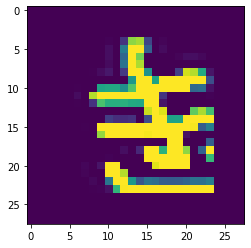

In [15]:
from PIL import Image, ImageFilter


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png")

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

x=imageprepare('/content/gdrive/My Drive/test_img2.png')#file path here
x = np.array(x)
x = x.reshape((img_rows,img_cols))
plt.imshow(x)
x = x.reshape((1,img_rows,img_cols,1))
print(x.shape)

print(model.predict(x),end='\n\n')
print(result(model.predict(x)))

(1, 28, 28, 1)
[[7.5181125e-04 2.2824991e-01 3.1927291e-01 4.2012198e-05 1.7176749e-03
  2.4909168e-03 4.4555095e-01 9.3775732e-04 6.7200483e-04 3.1407431e-04]]

ま


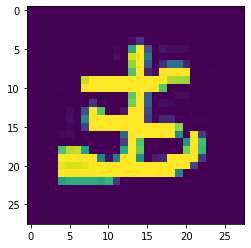

In [17]:
x=imageprepare('/content/gdrive/My Drive/test_img4.png')#file path here
x = np.array(x)
x = x.reshape((img_rows,img_cols))
plt.imshow(x)
x = x.reshape((1,img_rows,img_cols,1))
print(x.shape)

print(model.predict(x),end='\n\n')
print(result(model.predict(x)))

(1, 28, 28, 1)
[[0.0706311  0.0737915  0.05240329 0.08972968 0.11998547 0.05867351
  0.088935   0.01539715 0.35717577 0.07327756]]

れ


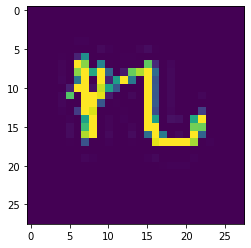

In [18]:
x=imageprepare('/content/gdrive/My Drive/test_img5.png')#file path here
x = np.array(x)
x = x.reshape((img_rows,img_cols))
plt.imshow(x)
x = x.reshape((1,img_rows,img_cols,1))
print(x.shape)

print(model.predict(x),end='\n\n')
print(result(model.predict(x)))